## Nick Zizos 22/09/2016

# Survival Analysis

In [1]:
% matplotlib inline

<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>

## Summary

Survival Analysis is not a new technique - It has been used in the field of Engineering and medical research for years. It is an alternative (and arguably more statistically accurate) way of understanding churn, as is another mechanism to understand along with retention.

As a basic description:

* Survival Analysis provides a better understanding of customer churn.


* Survival Curves shows the probability that a player will still be playing the game past a certain date.


* Alongside Survival, Hazard analysis can show when the users are churning out of our games. Hazard Curves shows the rate at which players are leaving the game each day.


* Using Cox proportional Hazards model (not part of this write-up) we can identify key features which drive users to have a shortened life in our games. DoT has successfully used this to understand new key actions to drive to increase longevity of users.

## Introduction to Survival Analysis

* Survival analysis is generally defined as a set of methods for analysing data where the outcome variable is the time until the occurrence of an event of interest. The response is often referred to as a failure time, survival time, or event time. In our case it is the length of time (minutes or days etc. that the user plays our game before they lapse)


* Observations are called censored when the information about their survival time is incomplete; the most commonly encountered form is right censoring.

#### Survival curves

* If time to event has the probability density function $f(t)$ and cumulative distribution function $F(t)$, then the probability of surviving at least to time $t$ is: $Pr(T>t)=S(t)=1-F(t)$.
    
    The likelihood function for survival analysis is described as:

 $$ l(\beta) = \prod\limits_{i=1}^n h(t_i)^{d_i} S(t_i) $$

where $d_i$ is the censoring variable that equals to 1 if the event is observed for individual an $i$ and 0 if the event is not observed (censored). $h(t_i)$ is the hazard for individual $i$ at time $t$, $H(t_i)$ is the cumulative hazard for an individual $i$ at time $t$, and $S(t_i)$ is the survival probability at time $t$.

#### Hazard curves


* Cumulative hazard at time $t$ is defined as $H(t)=-ln(S(t))$ and instantaneous hazard at time $t$ is     $h(t)=\frac{dH(t)}{dt}$. The instantaneous hazard can also be written as $h(t)=\frac{f(t)}{S(t)}$


* Semi-parametric Methods

Cox proportional hazard model estimates the hazard ratio of covariates with respect to a refence value, under the assumption that the estimated hazard ratios are constant (they do not depend on time) although the hazards might change. 

$$h(t)=h_{0}e^{\bf{X^{T}}\bf{\beta}}$$

where $h_{0}$ is the baseline hazard and $e^{\bf{X^{T}}\bf{\beta}}$ is the hazard ratio, $\bf{X}$ are the covariates and $\bf{\beta}$ are the coefficients. The baseline hazard $h_{0}$ is unspecified and is left out of the likelihood function. For this reason the Cox proportional hazards model has a partial likelihood function:

$$ L(\beta)=\prod_{i=1}^{n}\Bigg[\frac{e^{x_{i}^{T}\beta}}{\sum_{k\in{R(t_{i})}}e^{x_{k}^{T}\beta}}\Bigg]^{d_{i}} $$

where $d_{i}$ is the censoring variable that equals to 1 if the an event occured at time $t_{i}$ and to 0 if the unit was censored at time $t_{i}$. Therefore only the units that experience the event contribute to the likelihood function. In the Cox proportional hazards likelihood function, the numerator is the hazard of unit $i$, and the denominator is the sum of the hazards of all units that are still under risk of event (did not experience the event and was not censored before the time at which unit $i$ experienced the event). Note that these hazards do not depend on the value of $t$, it is only the ordering of $t$ that matters.

The assumption is that each event time is unique, and there is only one possible value for the partial likelihood at time $i$. This assumption does not hold for many types of data, including the data set we are working with here. Many groups ended within the first year of their start (these are assumed to have a survival time of 1 year). Because we do not have more precise information on survival times which would have allowed us to have uniqe event times for the groups who have ended, we have to use an approximation method. 
  
The first approximation method is the 'exact method' which finds the likelihood function value for a survival time $i$ as the sum of the probability of each permutation of event time orderings at that time. But this method is computationally too expensive. Instead Efron approximation is often used. Efron approximation likelihood is given by:

$$ L(\beta)=\prod_{i=1}^{n}\Bigg[\frac{e^{x_{i}\beta}}{\prod_{k=1}^{d_{1}}(\sum_{j\in{R_{t_{i}}}} e^{x_{j}\beta}-\frac{k-1}{d_{i}}\sum_{j\in{D_{t_{i}}}}e^{x_{j}\beta})}\Bigg]^{d_{i}}$$

where $d_{i}$ is the number of ties at time $t_{i}$, $D_{t_{i}}$ denotes the units that experienced the event at time $t_{i}$ and $R_{t_{i}}$ denotes the units that are still at risk of event at time $t_{i}$. We can use the CoxPHFitter from Lifelines package to fit a Cox proportional hazards model. The default approximation method in CoxPHFitter is the Efron approximation.

## Difference between survival and retention-Why we should use survival curve

* Unlike ordinary regression models, survival methods correctly incorporate information from both censored and uncensored observations in estimating important model parameters. This means that even users that we do not know whether they have churned are still incorporated into the model


* Hazard Curve Helps us identify at which stage of the game has the highest churn rate


* The main difference between Survival and retention is survival is independent of the effect of play frequency. As an example, a game that has an average days played per week of 3, means that retention will only pick that user up 3 out of 7 days of play (on average). This leads to fluctuations in the retention metric. Survival has been proven to be a more robust performance indicator.

## Lifelines Package for Survival Analysis

* lifelines is a implementation of survival analysis in Python. What benefits does lifelines offer over other survival analysis implementations?

* built on top of Pandas
* internal plotting methods
* simple and intuitive API (designed for humans)
* only does survival analysis (No unnecessary features or second-class implementations)

http://lifelines.readthedocs.io/en/latest/Quickstart.html

### Calculating survival curves in python: an example of the lifelines package

In [2]:
from libanalytics.ztrack import make_vertica_query
import pandas as pd

users = make_vertica_query("""
select user_uid
, firstdate::datetime
, lastdate::datetime
from star.v_user
where game_id = 5002939
and client_id in (2,3)
and sn_id in (18,99)
and firstdate between '2016-03-01' and '2016-08-03'
group by user_uid
, firstdate::datetime
, lastdate::datetime
""")
users.head()


select user_uid
, firstdate::datetime
, lastdate::datetime
from star.v_user
where game_id = 5002939
and client_id in (2,3)
and sn_id in (18,99)
and firstdate between '2016-03-01' and '2016-08-03'
group by user_uid
, firstdate::datetime
, lastdate::datetime



,user_uid,firstdate,lastdate
0,72157851438,2016-06-16,2016-06-16
1,71945055518,2016-03-16,2016-06-25
2,72082496710,2016-05-14,2016-05-14
3,72148394750,2016-06-12,2016-06-12
4,72256770662,2016-07-23,2016-07-23


We need to pre-process the data so that lifelines can use it:

    * We want to get the recorded length of time the user was active - that is the days between install (firstdate) and its last DAU date (lastdate).
    * We want whether we know the 'death' or churn of the user was recorded or they were censored.

In our case we define a death event for a user as if we observe 14 days of inactivity of that user. at the time of writing this (2016-08-03) it means users will be cencored if they have played after 2016-07-20

In [3]:
users['activity'] = (users['lastdate'] - users['firstdate']).astype('timedelta64[h]')/24
users['cutoff'] = pd.to_datetime('2016-07-20')
users['event'] = [0 if x['lastdate'] > x['cutoff'] else 1 for i, x in users.iterrows()]
users.head()

,user_uid,firstdate,lastdate,activity,cutoff,event
0,72157851438,2016-06-16,2016-06-16,0.0,2016-07-20,1
1,71945055518,2016-03-16,2016-06-25,101.0,2016-07-20,1
2,72082496710,2016-05-14,2016-05-14,0.0,2016-07-20,1
3,72148394750,2016-06-12,2016-06-12,0.0,2016-07-20,1
4,72256770662,2016-07-23,2016-07-23,0.0,2016-07-20,0


We can now start using the lifelines package. Remember to have installed it into your virtual environment using

`pip install lifelines`

If anyone has used scikit-learn, it works very similarly to the way you would fit a model using their methods.

In [7]:
from lifelines import KaplanMeierFitter, NelsonAalenFitter
kmf = KaplanMeierFitter()
kmf.fit(users['activity'], event_observed=users['event'])

<lifelines.KaplanMeierFitter: fitted with 387226 observations, 46471 censored>

We can now get the survival function using the in-built functions

In [ ]:
kmf.survival_function_.plot()
plt.title('Survival function of political regimes');

And the hazard curve and differenced hazard curve. Note the differenced curve needs smoothing parameter to smooth the curve for better understanding

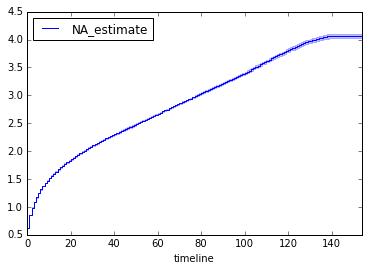

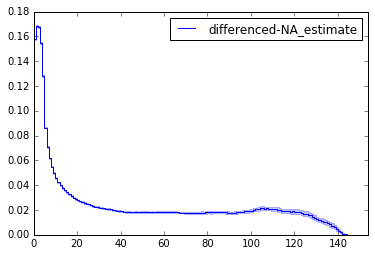

In [15]:
naf = NelsonAalenFitter()
naf.fit(users['activity'], event_observed=users['event'])
naf.plot()
naf.plot_hazard(bandwidth=5)

## Useful references

Here are a few references for Survival analysis

    * http://lifelines.readthedocs.io/en/latest/index.html
    * https://en.wikipedia.org/wiki/Survival_analysis

And in particular if you want to know more about the Kaplan-Meier estimator and the Nelson-Aalen estimator for survival and hazard curves  you can find references here:
    
    * https://en.wikipedia.org/wiki/Kaplan%E2%80%93Meier_estimator
    * https://en.wikipedia.org/wiki/Nelson%E2%80%93Aalen_estimator

In [19]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>